<a href="https://colab.research.google.com/github/akshat0522/EDA-on-AirBnB-NYC-Dataset/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Akshat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Accessing and Reading the Data
---

In [1]:
# Importing liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Creation of DataFrame and Reading the data
airBnB_Data = pd.DataFrame()
airBnB_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 1 : Python for Data Science/Capstone Project - EDA on AirBnB Bookings Analysis/AirBnB Bookings Analysis/Airbnb NYC 2019.csv')

# Understanding the dataset
---

In [4]:
# Getting the basic information of dataset
airBnB_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Calculating the total null values in the given dataset
airBnB_Data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Exploration and Analysis
---

## 1). What are the different room types in the whole dataset.?

In [34]:
# Doing the value count on room_type column and storing the value in room data variable
airBnB_Data['room_type'].value_counts().sort_values()

Shared room         1160
Private room       22326
Entire home/apt    25409
Name: room_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Types of rooms in the whole Data Set')]

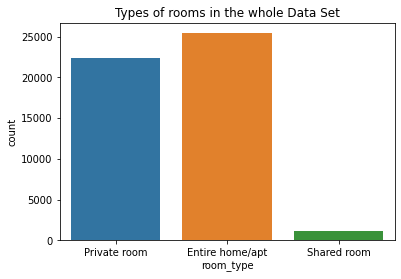

In [35]:
# Representing the room types using seaborn countplot
sns.countplot(airBnB_Data.room_type).set(title='Types of rooms in the whole Data Set')

**Comments** - This shows that the entire home / apt category has the highest number of rooms followed by private rooms. Shared room is the least prefered category.

## 2). Room types on Neighbourhood Groups

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Rooms types on Neighbourhood Group')]

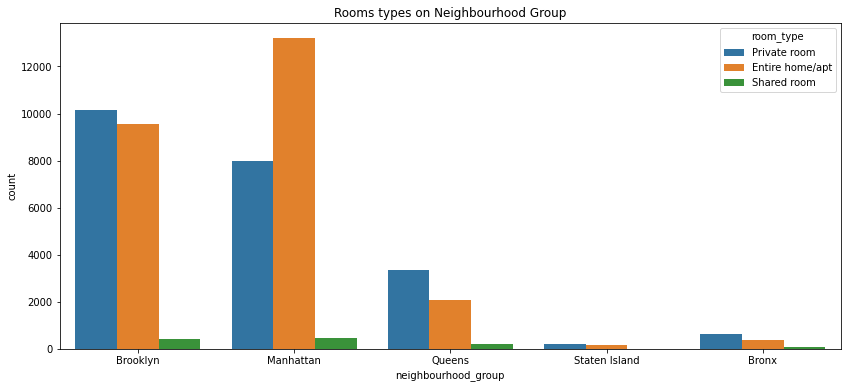

In [36]:
plt.figure(figsize=(14,6))
sns.countplot(airBnB_Data.neighbourhood_group, hue = airBnB_Data.room_type).set(title='Rooms types on Neighbourhood Group')

**Comments** - Neighbourgroup wise visualization of room types. In manhatten, we have highest "Entire home / apt" category whereas Brooklyn has the highest number of private rooms. Staten Island is having the least number of listings in all three types of rooms category.

## 3). Top 10 neighbourhoods having maximum listings and their room types.

In [37]:
airBnB_Data['neighbourhood'].value_counts().sort_values(ascending = False).head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

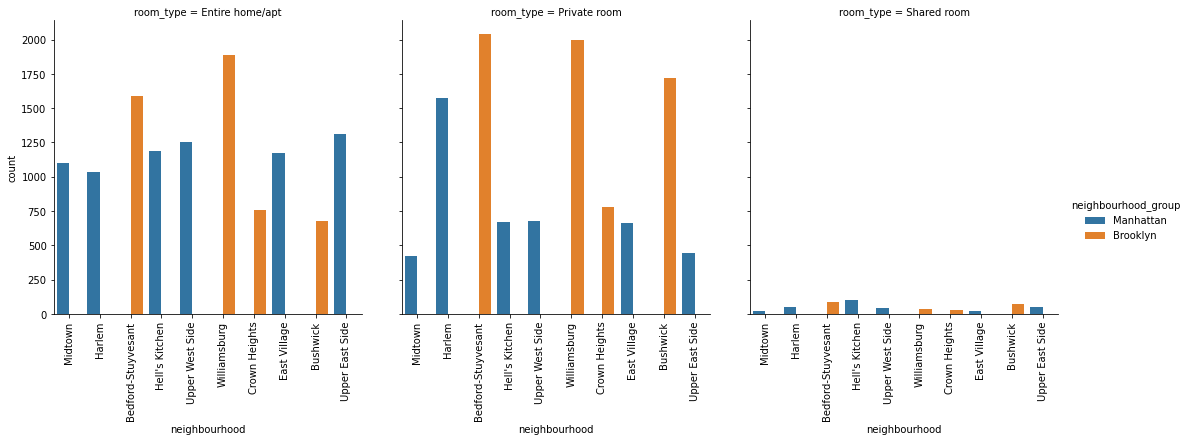

In [38]:
top_neighbourhood = airBnB_Data.loc[airBnB_Data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

sns.catplot(x='neighbourhood', hue='neighbourhood_group', col ='room_type', data=top_neighbourhood, kind='count').set_xticklabels(rotation=90)


**Comments** - After calculating we got to know that top 10 neighbourhoods belongs to only 2 neighbourhood_groups which are "Manhatten" and "Brooklyn". And their accociated room types can also be seen in the plot clearly.

## 4). Which room type is the most expensive.? And what is the average price of each room category.?

In [39]:
# Grouping by room type and price and getting room price average
expensive_rooms = airBnB_Data.groupby('room_type')['price'].mean().reset_index()
# Creating a seperate dataframe for better visualization
expensive_rooms_df = pd.DataFrame(expensive_rooms)
expensive_rooms_df

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


[Text(0.5, 1.0, 'Price of Different Room Type')]

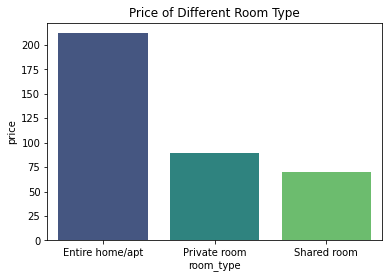

In [40]:
sns.barplot(x="room_type", y="price", data = expensive_rooms_df, palette='viridis') \
.set(title ='Price of Different Room Type')


**Comments** - The most expensive category of rooms is the "Entire home/apt" followed by "Private room" and "shared room" is the least expensive comparing to others.

## 5). What is the average price of rooms of all the neighbourhood groups.?

In [41]:
# Grouping by "neighbourhood/group" and mean of prices 
neighbour_group_avg_price = airBnB_Data.groupby('neighbourhood_group')['price'].mean()
neighbour_group_avg_price

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

Text(0, 0.5, 'Average Price')

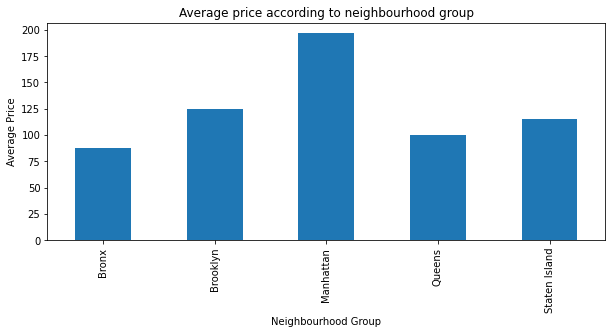

In [42]:
plt.figure(figsize=(10,4))

neighbour_group_avg_price.plot(kind = 'bar', )

plt.title('Average price according to neighbourhood group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')

**Comments** - Highest room price is in "Manhatten" and the lowest is in "Bronx".

## 6). Name of different neighbourhood groups and number of listings associated with them.?

In [43]:
# Getting the unique neighbourhood groups
airBnB_Data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [44]:
# Doing value_count() on neighbourhood group to get the number of associated listings
neighbourgroup_listings = airBnB_Data['neighbourhood_group'].value_counts().reset_index()
neighbourgroup_listings_df = pd.DataFrame(neighbourgroup_listings)
neighbourgroup_listings_df.rename(columns = {'index' : 'Neighbourhood Group' , 'neighbourhood_group' : 'Number of listings'}, inplace = True)
neighbourgroup_listings_df

,Neighbourhood Group,Number of listings
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


[Text(0.5, 1.0, 'Number of listings on the basis of neighbour group')]

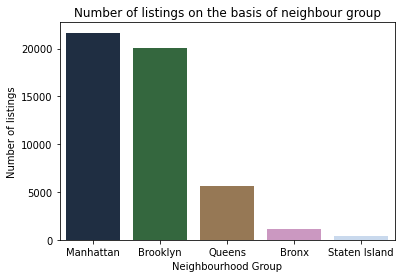

In [45]:
#Representing the neighbouthood groups using matplotlib functions

sns.barplot(x="Neighbourhood Group", y="Number of listings", data = neighbourgroup_listings_df, palette='cubehelix') \
.set(title ='Number of listings on the basis of neighbour group')
# plt.ylabel('Number of listings')
# plt.xlabel('Neighbourhood Group')

**Comments** - Manhatten, Brooklyn and Queens are the top 3 neighbourhood groups in terms of total number of listings associated with them.

## 7). Hosts with maximum number of listings.

In [46]:
# Calculating top hosts by doing value_counts() on Host_Id
top_hosts = airBnB_Data['host_id'].value_counts().head(20)

Text(0, 0.5, 'Number of Listings')

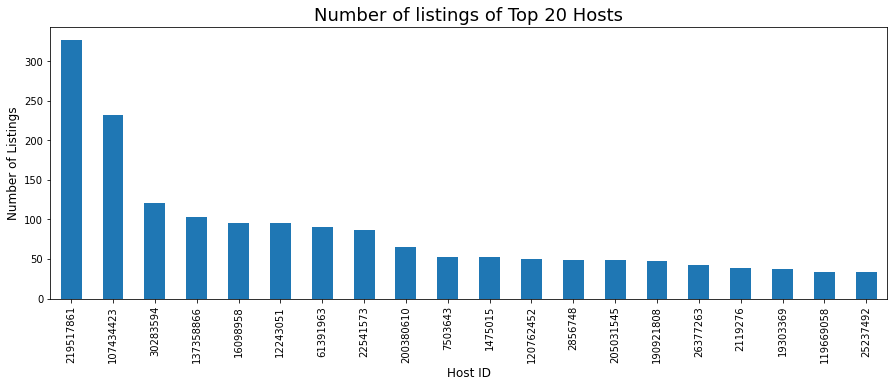

In [47]:
top_hosts.plot(kind = 'bar', figsize = (15,5))

plt.title('Number of listings of Top 20 Hosts', fontsize = 18)
plt.xlabel('Host ID', fontsize = 12)
plt.ylabel('Number of Listings', fontsize = 12)

Representing top 20 hosts accoring to their listings in decreasing order.

## 8). Which are top neighbourhoods with respect to average price/day?

In [48]:
# Calculating average price and storing top 10 neighbourhood
neighbour_avg_price = airBnB_Data.groupby('neighbourhood')['price'].mean().sort_values(ascending = False).head(10)
neighbour_avg_price

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64

Text(0, 0.5, 'Average price per day')

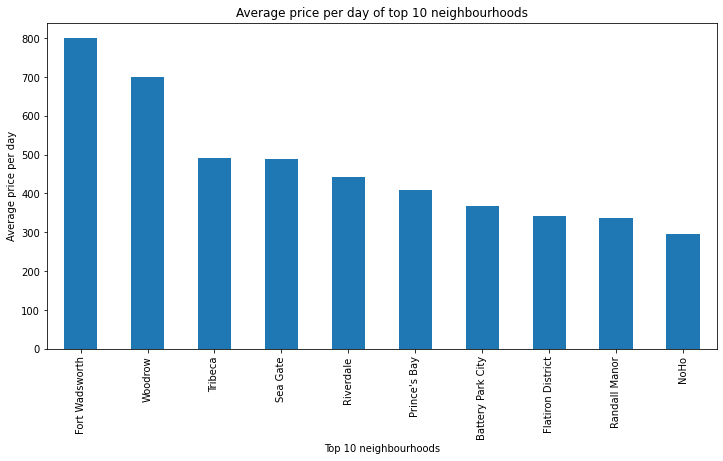

In [49]:
neighbour_avg_price.plot.bar(figsize = (12,6))
plt.title('Average price per day of top 10 neighbourhoods')
plt.xlabel('Top 10 neighbourhoods')
plt.ylabel('Average price per day')

**Comments** - Among all the nieghbourhoods under neighbourhood groups "Fort Wadsworth" is the most expensive neighbourhood where average per day price of rooms is highest in the whole data set.

# **Findings** -

## On the basis of above exploration and analysis, following points can be considered - 

### "Neighbourhood group - Manhatten"
*   Most preffered location is "Manhatten".
*   Why ? 

    1.   In the whole airbnb data set, most preffered room type is "Entire home/ apt". And the highest number of this room category is the found in manhatten.
Which means people have more option for their desired room category in manhatten thats why they preffer manhatten.
    2.   Average room price on the basis of neighbourhood_group, is highest in manhatten. But if look at the bigger picture and try to figure out the most expensive rooms on the basis of neighbourhood, we found that the most expensive rooms are in "Fort-Wadsworth" which is in Staten Island. And that is least preffered place.

### Neighbourhood Group - Staten Island
*   Least preffered place is "Staten Island"
*   Why?
    1.  Most preffered room category is "Entire home/apt" and Staten Island has the least number of rooms of this category.
    2.  The average per day price on the basis of neighbourhoods, in staten island there are very expensive neighbourhoods.

---

